# Innlevering 3 &mdash; Ligningsløsning

**TMA4400 Matematikk 1: Kalkulus og lineær algebra**

Innleveringsfrist: **24. oktober 2025, klokka 16.00**

---

_Du **skal** levere besvarelsen din som en pdf-fil i <a href="https://ovsys.math.ntnu.no/login/?next=/">Ovsys</a>. Der skal du også legge ved all kode du eventuelt bruker._ 

_Du kan ta utgangspunkt i denne Jupyter notebook-en, endre den, lagre den som pdf, og levere den inn._

---

De fleste ligninger som følger fra praktiske anvendelser er
umulige å løse for hånd. 
Under ser du et bilde av en torsjonsfjær.
Dette er en slik fjær du finner i musefeller og i gamle dører
og den leverer et moment
som er proporsjonalt med utslagsvinkelen $\theta$.


<p style="text-align: center;">
<img src="bilde/figur3-1.jpg" alt="Figur av torsjonsfjær" width="500"></p>


Vi fester en horisontal stang med lengde $l$ i en vegg med en torsjonsfjær med stivhet $k$
og legger en vekt $m$ ytterst på stangen.
Gravitasjonskraften fra vekten gir dreiemomentet $ml\cos \theta$,
så hvis vi har lyst til å regne ut hvor langt ned vekten drar stangen,
må vi finne punktet der momentet fra fjæren balanserer momentet fra vekten:
\begin{align*}
	k\theta = ml\cos \theta.
\end{align*}
Vi setter $ml/k=1$.

<p style="text-align: center;">
<img src="bilde/figur3-2.png" alt="Figur av idealisert oppsett" width="500"></p>


La oss plotte funksjonene $f(\theta)=\theta$ og $g(\theta)=\cos \theta$ vha. python.


In [1]:
%matplotlib inline
import math

# fikser litt på pyplot
import numpy as np
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

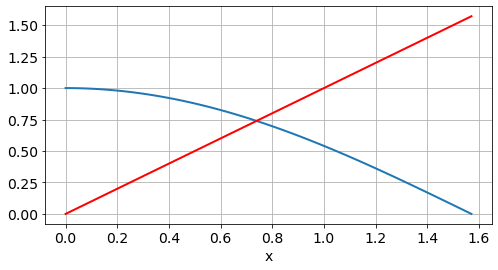

In [2]:
# plotter funksjonen på et intervall 
x = np.linspace(0, math.pi/2, 101)     # antall x-verdier i intervallet [0,pi/2]
plt.plot(x, np.cos(x))                 # plotter funksjonen f(x) i blått
plt.plot(x, x, 'r')                    # plotter y=x i rødt
plt.xlabel('x')
plt.grid(True)

<ol type="1." start="1.">
<li> Argumenter for at funksjonene $f(\theta)=\theta$ og $g(\theta)=\cos(\theta)$ krysser hverandre nøyaktig en gang i intervallet $[0,\pi/2]$. 
</li>
</ol>

Løsningen til likningen eksisterer altså i intervallet $[0,\pi/2]$,
men den er utfordrende å finne med penn og papir.
Løsningen kalles dottietallet og er oppkalt etter en professor i fransk.
Professor Dottie oppdaget at hvis hun skrev inn et tilfeldig tall på en kalkulator
og trykket gjentatte ganger på cosinusknappen,
endte hun alltid opp på omtrent $0.739085$.

<ol type="1." start="2.">
<li> Løs likningen $\theta=\cos \theta$ med fikspunktiterasjon. 
<p><p>
Spiller initialverdien $a_0$ noen rolle i iterasjonen? Hvor mange interasjoner trengs for å nå presisjonen $10^{-12}$? 
<p><p>    
Bruk gjerne Jupyter notebook-ene om fikspunktiterasjoner.
</li>
</ol>

Under har vi visualisert fikspunktiterasjonen ved hjelp av et såkalt "coweb plot".

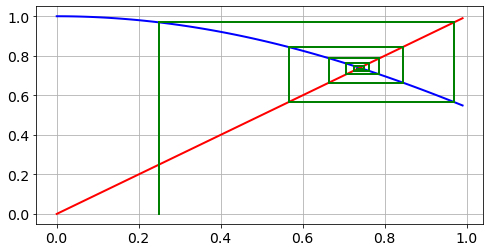

In [3]:
# pakkene vi trenger
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# fikser litt på pyplot
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

# høyresida i den fikspunktiterasjonen
def F(x):
    return np.cos(x)

#parametre
a0 = 1/4  # initialverdi
nmax = 10 # vi itererer nmax ganger

# itererer a_{n+1} = f(a_n) nmax ganger; vi starter på (0,a_0)
a = np.zeros(nmax+1) # vi begynner med en vektor u som har nullere overalt
a[0] = a0
punkter = [(0,a0)]

for i in range(1, nmax+1):
    a[i] = F(a[i-1])
    ai = a[i]
    punkter.append((i,ai))

# cobweb-plottet

x = np.arange(0, 1., 0.01) 

# vi plotter y = f(x) og y = x, hvor x representerer u_n
plt.plot(x, F(x), 'b') # plotter y = f(x) i blått 
plt.plot(x, x, 'r')        # plotter y = x i rødt

# visualiser coweb i grønt
plt.plot([a[0],a[0]], [0,a[1]],'g') # første vertikale linje mellom punktene (a[0],0) og (a[0],a[1])
for i in range(1, nmax):
    plt.plot([a[i],a[i]],[a[i],a[i+1]],'g') # lager vertikal linje mellom punktene (a[i],a[i]) og (a[i],a[i+1])

for i in range(0, nmax):
    plt.plot([a[i],a[i+1]],[a[i+1],a[i+1]],'g') # lager horisontal linje mellom punktene (a[i],a[i+1]) og (a[i+1],a[i+1])

plt.show()

Newtons metode leter etter nullpunkter til funksjonen $f(x)$. Den er gitt ved

$$
a_{n+1} = a_n - \frac{f(a_n)}{f'(a_n)}.
$$


<ol type="1." start="3.">
<li> Løs likningen $\theta = \cos \theta$ med Newtons metode.
<p><p>
Spiller initialverdien $a_0$ noen rolle i iterasjonen? Hvor mange interasjoner trengs for å nå presisjonen $10^{-12}$? 
<p><p>
Bruk gjerne Jupyter notebook-en om Newtons metode.
</li>
</ol>

Under har vi visualisert Newtons metode ved å tegne inn tagentene i hvert steg i iterasjonen.

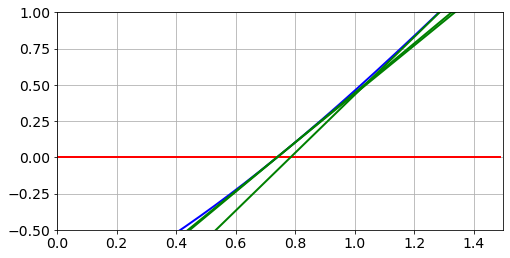

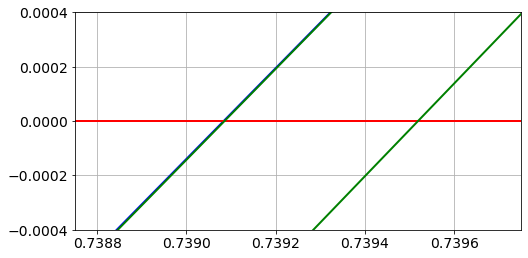

In [4]:
# pakkene vi trenger
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# fikser litt på pyplot
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

# funksjonen f(x) i Newtons metode
def f(x):
    return x-np.cos(x)

def df(x):
    return 1+np.sin(x)

#parametre
a0 = 1.5 # initialverdi
nmax = 4 # vi itererer nmax ganger

# itererer a_{n+1} = f(a_n) nmax ganger; vi starter på (0,a_0)
a = np.zeros(nmax+1) # vi begynner med en vektor u som har nullere overalt
a[0] = a0
punkter = [(0,a0)]

for i in range(1, nmax+1):
    a[i] = a[i-1]-f(a[i-1])/df(a[i-1])
    ai = a[i]
    punkter.append((i,ai))

# tangent-plottet, oversikt

x = np.arange(0.0, 1.5, 0.01) # et oversiktsplot

plt.plot(x, f(x), 'b')  # plotter f(x) i blått 
plt.plot(x, x*0, 'r')    # plotter x-aksen

for i in range(1, nmax):
    plt.plot(x, f(a[i-1])+df(a[i-1])*(x-a[i-1]), 'g') # plotter tangenten for hver iterasjon

plt.xlim(0.0,1.5) # du kan endre denne for å zoome inn på bildet
plt.ylim(-0.5,1.0)

plt.show()

# tangent-plottet, nærme nullpunktet

x = np.arange(0.0, 1.5, 0.01) # et oversiktsplot

plt.plot(x, f(x), 'b')  # plotter f(x) i blått 
plt.plot(x, x*0, 'r')    # plotter x-aksen

for i in range(1, nmax):
    plt.plot(x, f(a[i-1])+df(a[i-1])*(x-a[i-1]), 'g') # plotter tangenten for hver iterasjon

plt.xlim(0.73875,0.739750) # du kan endre denne for å zoome inn på bildet
plt.ylim(-0.0004,0.0004)

plt.show()

Som du ser av oppgavene over, 
oppfører disse to metodene seg helt forskjellig. 
Dersom vi skal forstå hvorfor, 
trenger vi Taylors teorem:

---

**Teorem.**  Anta at $f(x)$ og dens deriverte av orden $k\in\{1,2,\ldots,n+1\}$, $f^{(k)}(x)$, er kontinuerlige på et åpent intervall $I$ om punktet $x=x_0$. Da er  

\begin{align*}
f(x)&=f(x_0)+f'(x_0)(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2\\
&\quad+\cdots+\frac{f^{(n)}(x_0)}{n!}(x-x_0)^n+R_n(x),\qquad \text{for alle $x\in I$},
\end{align*}

hvor 

$$
R_n(x)=\frac{f^{(n+1)}(c)}{(n+1)!}(x-x_0)^{n+1}, \qquad \text{for en $c$ mellom $x$ og $x_0$.}
$$

---

Legg merke til at når $n=0$ er dette sekantsetningen. 

Vi skal nå analysere fikspunktiterasjonen

$$
a_{n+1}=g(a_n),
$$

for en vilkårlig kontinuerlig funksjon $g(x)$ og initialverdi $a_0$.

<ol type="1." start="4.">
<li> Anta at $r$ er et fikspunkt for $g(x)$, altså at $g(r)=r$. Bruk Taylors teorem med $n=0$ på $g(x)$ om $x=r$ til å vise at dersom $g'(x)$ er kontinuerlig i et åpent område om $r$, finnes en $\xi_n$ mellom $a_n$ og $r$ slik at

$$
a_{n+1}-r=g'(\xi_n)(a_n-r).
$$

Du kan anta at $a_n$ er nærme nok $r$ for alle $n\in\{0,1,2,\ldots\}$.
</li>
</ol>

Ved å betrakte Newtons metode som en fikspunktiterasjon, 

$$
a_{n+1} = a_n - \frac{f(a_n)}{f'(a_n)} = g(a_n),
$$

for en vilkårlig kontinuerlig $f(x)$ med antagelser spesifisert senere, kan vi analysere den på lignende vis. 

<ol type="1." start="5.">
<li> Bruk Taylors teorem med $n=1$ på $f(x)$ om $x=a_n$ til å vise at det finnes $\xi_n$ slik at 

$$
a_{n+1}-r=  \frac{f''(\xi_n)}{2f'(a_n)}(a_n-r)^2.
$$
    
Hvilke antagelser gjorde du underveis?
</li>
</ol>

Definer $e_{n}=|a_n-r|$ og definer så konvergensordenen for en gitt fikspunktiterasjon $a_{n+1}=g(a_n)$ til å være det reelle tallet $q$ slik at grenseverdien

$$
\lim_{n\to\infty}\frac{e_{n+1}}{(e_{n})^q}
$$

eksisterer og er forskjellig fra $0$.

<ol type="1." start="6.">
<li> Ta utgangspunkt i at du skal løse $\theta=\cos(\theta)$. 
<p><p>
Hva kan du si om konvergensordenen for fikspunktiterasjonen og Newtons metode basert på utregningene i oppgave 4 og 5? 
<p><p>
Anta at $e_0=|a_0-r|<1$. Hvorfor konvergerer Newtons metode raskere enn fikspunktiterasjonen?
</li>
</ol>

La $A=L+D+U$. Jacobi-metoden

$$
\mathbf{a}_{n+1} = D^{-1}\left(b - (L+U)\mathbf{a}_n\right)
$$

for lineære systemer $A\mathbf{x}=b$ er også en fikspunktiterasjon. Den konvergerer for eksempel når matrisa $A$ er strengt diagonaldominant.

<ol type="1." start="7.">
<li>Bruk Jacobi-metoden på ligningssystemet 

$$
3x_1 + x_2 - x_3 =  4, \\
2x_1 - 5x_2 + 2x_3 =  5, \\
x_1 + 6x_2 + 8x_3 =  3. 
$$
Prøv å avgjøre om metoden vil konvergerer før du kjører den. 
<p><p>    
Skriv ned løsningsvektoren og hvor mange iterasjoner du trenger for å nå presisjonen $10^{-12}$. Spiller initialvektoren $\mathbf{a}_0$ noen rolle i iterasjonen?
<p><p>
Bruk gjerne Jupyter notebook-en om Jacobi-metoden.
</li>
</ol>

<ol type="1." start="8.">
<li>Jacobi-metoden fungerer ikke på

$$
3x_1 + 2x_2 + 6x_3 =  4, \\
x_1 + 8x_2 + x_3 =  5, \\
9x_1 + 2x_2 - x_3 =  3.
$$

Foreslå hvordan du kan endre systemet (uten å endre løsningsmengden) slik at Jacobi-metoden fungerer.
<p><p>    
Skriv ned løsningsvektoren og hvor mange iterasjoner du trenger for å nå presisjonen $10^{-12}$.
<p><p>
Bruk gjerne Jupyter notebook-en om Jacobi-metoden.
</li>
</ol>